# Project 2 - Data Wrangle and Analyze Data

#### Student: Waldecyr Souza

# Introduction

#### The effort to gather, assess and clean the data obtained from different sources was motivated to answer the following questions:
- What are the most frequent breeds?
- What breeds receive more favorites?
- What dogs stage receive more retweets?

#### The lines below present the steps in order to have these insights. The visualizations were prepared in Tableau and are presented in pdf file.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import json 

import tweepy
from tweepy import OAuthHandler
from twython import Twython

import matplotlib.pyplot as plt
from matplotlib import pyplot, pylab
% matplotlib inline

_____________
# Twitter keys and tokens

In [2]:
consumer_key = ''
consumer_secret = ''
access_token = '-'
access_secret = ''

In [3]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

______________________
# Gather

## 1 of 2 - image-predictions.tsv

Downloading the dataframe programmatically from internet.

df name: df_breed

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions = requests.get(url)

with open((url.split('/')[-1]), mode = 'wb') as file:
        file.write(image_predictions.content)
        
df_breed = pd.read_csv('image-predictions.tsv', sep='\t')
df_breed.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
1572,795076730285391872,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False


## 2 of 2 - 2k_tweets

This file was already available for this project.

df name: df_2k

In [5]:
df_2k_twt = pd.read_csv('twitter-archive-enhanced.csv')
df_2k_twt.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
896,759099523532779520,NaN,NaN,2016-07-29 18:53:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He has a drinking problem. Inflatab...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759099523...,7,10,Toby,None,None,None,None
2170,669351434509529089,NaN,NaN,2015-11-25 03:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sully. He's a Leviticus Galapagos. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669351434...,10,10,Sully,None,None,None,None


# Assess

## df_breed

Let us print again some more rows of each dataframe so we can see if there are issues to deal with. We shoud print some information regarding them.

In [6]:
df_breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [7]:
df_breed.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [8]:
df_breed.sample(10, random_state=2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
756,688519176466644993,https://pbs.twimg.com/media/CY4ciRFUMAAovos.jpg,1,Pembroke,0.696372,True,Cardigan,0.121052,True,Shetland_sheepdog,0.050592,True
2004,877316821321428993,https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg,1,Saluki,0.509967,True,Italian_greyhound,0.090497,True,golden_retriever,0.079406,True
1044,712717840512598017,https://pbs.twimg.com/media/CeQVF1eVIAAJaTv.jpg,1,Great_Pyrenees,0.732043,True,kuvasz,0.121375,True,Irish_wolfhound,0.049524,True
1563,793601777308463104,https://pbs.twimg.com/media/CwNwmxvXEAEJ54Z.jpg,1,miniature_pinscher,0.538981,True,Chihuahua,0.217830,True,toy_terrier,0.089149,True
1696,816450570814898180,https://pbs.twimg.com/media/C1SddosXUAQcVR1.jpg,1,web_site,0.352857,False,envelope,0.060107,False,nail,0.031291,False
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1988,872820683541237760,https://pbs.twimg.com/media/DBzhx0PWAAEhl0E.jpg,3,pug,0.999120,True,French_bulldog,0.000552,True,bull_mastiff,0.000073,True
1660,811627233043480576,https://pbs.twimg.com/media/C0N6opSXAAAkCtN.jpg,1,beagle,0.396280,True,Pembroke,0.049562,True,wire-haired_fox_terrier,0.046349,True
404,673705679337693185,https://pbs.twimg.com/media/CVl7u00WcAAufzR.jpg,1,Shih-Tzu,0.165383,True,Lhasa,0.116977,True,Yorkshire_terrier,0.063899,True
1153,732726085725589504,https://pbs.twimg.com/media/CisqdVcXEAE3iW7.jpg,1,Pomeranian,0.961902,True,Samoyed,0.024289,True,chow,0.005772,True


## Issues detected on breed_df:
Issue 1 (quality): tweet_id column must not be integer.

Issue 2 (quality): Confiability of non breed prediction are useless. We must turn these values to 0.

Issue 3 (quality): We have rows with 3 values "False" for the predictions. This rows are useless. (e.g. index 1696)

Issue 4 (quality): We should have only one column with the higher prediction of True breed.

Issue 5 (tidiness): We should have only one column with the breed.

Issue 6 (tidiness): We have many columns regarding image predictions. We should only have 2: the breed and confidence of the prediction.

Issue 7 (quality): Some breed name are capitalized and some are not. (lines 3 and 4)

## df_2k_twt

In [9]:
df_2k_twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_2k_twt.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df_2k_twt.sample(20, random_state=5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1291,708119489313951744,NaN,NaN,2016-03-11 02:36:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He basks in the glory of rebel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708119489...,9,10,Cooper,None,None,None,None
2109,670449342516494336,NaN,NaN,2015-11-28 03:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Vibrant dog here. Fabulous tail. Only 2 legs t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670449342...,5,10,None,None,None,None,None
2325,666418789513326592,NaN,NaN,2015-11-17 00:53:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He is an Alaskan Terrapin. Lov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666418789...,10,10,Walter,None,None,None,None
1400,699446877801091073,NaN,NaN,2016-02-16 04:15:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He's undercover in all these p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699446877...,12,10,Archie,None,None,None,None
65,879492040517615616,NaN,NaN,2017-06-27 00:10:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. He thinks you should measure e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879492040...,12,10,Bailey,None,None,None,None
54,881666595344535552,NaN,NaN,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595...,13,10,Gary,None,None,None,None
2179,669006782128353280,NaN,NaN,2015-11-24 04:17:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He is 100% ready for the sport...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669006782...,12,10,Tucker,None,None,None,None
183,856543823941562368,NaN,NaN,2017-04-24 16:22:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Callie. She'll be your navigator today...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/856543823...,12,10,Callie,None,None,None,None
1771,678334497360859136,NaN,NaN,2015-12-19 22:02:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rosie. She has a snazzy bow tie and a ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678334497...,10,10,Rosie,None,None,None,None
1765,678410210315247616,NaN,NaN,2015-12-20 03:02:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jerome. He can shoot french fries...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678410210...,10,10,Jerome,None,None,None,None


## Issues detected on df_2k_twt:
Issue 8 (quality): tweet_id column is an integer. It should not be an object.

Issue 9 (quality): Reply status tweets and Retweets do not follow the pattern of the other We Rate Dogs tweets, so they make our data dirty.
 
Issue 10 (quality): Denominator Values range from 0 to 170. There should have only value "10".
 
Issue 11 (quality): The values "None" in columns doggo, floofer, pupper and puppo should be Null values.
 
Issue 12 (tidiness): Four columns with variable names: doggo, floofer, pupper and puppo.
 
Issue 13 (quality): There are two important columns missing: retweet count and favorite count.





# Gather and assess (again)

### Gather the missing 2 columns:  retweet count and favorite count

In [12]:
tweet_id = list(df_2k_twt.tweet_id)

tweet_data = {}
for tweet in tweet_id:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    
    except:
        print("Error for: " + str(tweet))
     

Creating a json file "tweet_json.txt", reading it and saving as a variable:

with open('tweet_json.txt', 'w') as f:
    json.dump(tweet_data, f)

In [13]:
with open('tweet_json.txt') as f:
    tweet_json = json.load(f)

Creating a list with the json information and converting as a df.

df name: tweets_df

In [14]:
df_list = []

for tweet_id in tweet_json.keys():
    retweets = tweet_json[tweet_id]['retweet_count']
    favorites = tweet_json[tweet_id]['favorite_count']
    df_list.append({'tweet_id': tweet_id,
                    'retweets': retweets,
                    'favorites': favorites})
    
df_2k_twt_2_columns = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
df_2k_twt_2_columns.sample(5)

,tweet_id,retweets,favorites
1480,692535307825213440,1441,3336
845,763183847194451968,1581,5689
2299,666691418707132416,47,186
2105,670408998013820928,229,561
314,834089966724603904,2271,10511


In [15]:
df_2k_twt_2_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id     2340 non-null object
retweets     2340 non-null int64
favorites    2340 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


 
## Issue 14 - Tidiness
- Since its all about tweets. Its approprieted to have only one master dataframe. 

# Issues list to be fixed

### Quality
#### Issues detected on breed_df:
- tweet_id column is an integer. It should not be an object.
- Confiability of non breed prediction are useless. We must turn these values to 0.
- We have rows with 3 values "False" for the predictions. This rows are useless. (e.g. index 1696)
- We should have only one column with the higher prediction of True breed.
- Some breed name are capitalized and some are not. (lines 3 and 4)

#### Issues detected on df_2k_twt:

- tweet_id column is an integer. It should not be an object.
- Reply status tweets and Retweets do not follow the pattern of the other We Rate Dogs tweets, so they make our data dirty.
- Denominator Values range from 0 to 170. There should have only value "10".
- The values "None" in columns doggo, floofer, pupper and puppo should be Null values.
- There are two important columns missing: retweet count and favorite count.



### Tidiness
#### Issues detected on breed_df:

- We should have only one column with the breed.
- We have many columns regarding image predictions. We should only have 2: the breed and confidence of the prediction.

#### Issues detected on df_2k_twt:
- Four columns with variable names: doggo, floofer, pupper and puppo.

#### Since its all about tweets. Its approprieted to have only one master dataframe. 

# Clean

Before start cleaning, we are going to make a copy of each dataframe:


In [16]:
df_breed_v1 = df_breed.copy()
df_2k_twt_v1 = df_2k_twt.copy()
df_2k_twt_2_columns_v1 = df_2k_twt_2_columns.copy()

## df_breed

### Issue 1

- tweet_id column is an integer. It should not be an object.

#### Define
Change the column datatype.

#### Code



In [17]:
df_breed_v1.tweet_id = df_breed_v1.tweet_id.astype('str')

#### Test

In [18]:
df_breed_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue 2

- Confiability of non breed prediction are useless. We must turn these values to 0.

#### Define
Change the prediction of non breed values to 0.

#### Code



In [19]:
mask = df_breed_v1.p1_dog == False
column_name = 'p1_conf'
df_breed_v1.loc[mask, column_name] = 0

mask = df_breed_v1.p2_dog == False
column_name = 'p2_conf'
df_breed_v1.loc[mask, column_name] = 0

mask = df_breed_v1.p3_dog == False
column_name = 'p3_conf'
df_breed_v1.loc[mask, column_name] = 0


#### Test

In [20]:
df_breed_v1.sample(10, random_state=50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1843,838561493054533637,https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg,1,kelpie,0.216562,True,doormat,0.000000,False,dalmatian,0.132820,True
303,671511350426865664,https://pbs.twimg.com/media/CVGwAh-W4AAIHJz.jpg,1,hermit_crab,0.000000,False,tick,0.000000,False,snail,0.000000,False
421,674045139690631169,https://pbs.twimg.com/media/CVqwedgXIAEAT6A.jpg,1,robin,0.000000,False,rhinoceros_beetle,0.000000,False,European_fire_salamander,0.000000,False
1432,773308824254029826,https://pbs.twimg.com/media/CrtYRMEWIAAUkCl.jpg,1,shopping_cart,0.000000,False,Labrador_retriever,0.151406,True,shopping_basket,0.000000,False
1745,822975315408461824,https://pbs.twimg.com/media/C2vLrpvWIAA3LM3.jpg,1,bathtub,0.000000,False,tub,0.000000,False,Pembroke,0.233162,True
426,674082852460433408,https://pbs.twimg.com/media/CVrSxy7WsAAFD2F.jpg,1,Pomeranian,0.666957,True,Shetland_sheepdog,0.028019,True,ski_mask,0.000000,False
1515,786709082849828864,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian_cat,0.000000,False,chow,0.102654,True
1533,789986466051088384,https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg,1,tub,0.000000,False,bathtub,0.000000,False,golden_retriever,0.078530,True
1702,817171292965273600,https://pbs.twimg.com/media/C1cs8uAWgAEwbXc.jpg,1,golden_retriever,0.295483,True,Irish_setter,0.144431,True,Chesapeake_Bay_retriever,0.077879,True
1337,758405701903519748,https://pbs.twimg.com/media/CoZl9fXWgAMox0n.jpg,4,Chesapeake_Bay_retriever,0.702954,True,laptop,0.000000,False,notebook,0.000000,False


### issue 3

- We have rows with 3 values "False" for the predictions. This rows are useless.

#### Define
Delete all rows that have value "False" for the three predictions.

#### Code

In [21]:
df_breed_v1 = df_breed_v1.drop(df_breed_v1[(df_breed_v1.p1_dog == False) &
                                           (df_breed_v1.p2_dog == False) &
                                           (df_breed_v1.p3_dog == False)].index)

df_breed_v1 = df_breed_v1.reset_index(drop=True)

#### Test

In [22]:
df_breed_v1.sample(10, random_state=100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
751,704347321748819968,https://pbs.twimg.com/media/CcZYJniXEAAEJRF.jpg,1,teddy,0.000000,False,feather_boa,0.000000,False,Brittany_spaniel,0.082917,True
1705,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.000000,False,dhole,0.000000,False,golden_retriever,0.006941,True
529,683742671509258241,https://pbs.twimg.com/media/CX0kVRxWYAAWWZi.jpg,1,Pembroke,0.895279,True,Cardigan,0.022385,True,cocker_spaniel,0.017045,True
170,670093938074779648,https://pbs.twimg.com/media/CUym4Y5WsAEiI9_.jpg,1,toy_poodle,0.383346,True,miniature_poodle,0.153678,True,chow,0.138543,True
1263,789137962068021249,https://pbs.twimg.com/media/CvOUw8vWYAAzJDq.jpg,2,Chihuahua,0.746135,True,Pekinese,0.070383,True,Pembroke,0.049237,True
1465,823939628516474880,https://pbs.twimg.com/media/C284uD8WgAEmMVn.jpg,1,schipperke,0.234076,True,curly-coated_retriever,0.193093,True,Labrador_retriever,0.095197,True
107,668507509523615744,https://pbs.twimg.com/media/CUcECBYWcAAzFRg.jpg,1,basenji,0.055379,True,Shetland_sheepdog,0.054322,True,whippet,0.051913,True
1357,806219024703037440,https://pbs.twimg.com/media/CzBD7MWVIAA5ptx.jpg,1,chow,0.835102,True,Pomeranian,0.040783,True,Eskimo_dog,0.021274,True
805,708810915978854401,https://pbs.twimg.com/media/CdYzwuYUIAAHPkB.jpg,2,golden_retriever,0.976139,True,Labrador_retriever,0.016301,True,Norfolk_terrier,0.001871,True
110,668542336805281792,https://pbs.twimg.com/media/CUcjtL8WUAAAJoz.jpg,1,American_Staffordshire_terrier,0.267695,True,French_bulldog,0.254050,True,Staffordshire_bullterrier,0.212381,True


In [23]:
print("Number of dropped rows: {}".format(len(df_breed) - len(df_breed_v1)))

Number of dropped rows: 324


### issue 4
-  We should have only one colum with the higher prediction of True breed.

#### Define
Create a colum with variables based on p1_dog, p2_dog or p3_dog. So we can assure the best prediction value is there.

#### Code

In [24]:
df_breed_v1['best_prediction'] = df_breed_v1[['p1_conf','p2_conf','p3_conf']].max(axis=1)

##### Test

In [25]:
df_breed_v1.sample(10, random_state=100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,best_prediction
751,704347321748819968,https://pbs.twimg.com/media/CcZYJniXEAAEJRF.jpg,1,teddy,0.000000,False,feather_boa,0.000000,False,Brittany_spaniel,0.082917,True,0.082917
1705,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.000000,False,dhole,0.000000,False,golden_retriever,0.006941,True,0.006941
529,683742671509258241,https://pbs.twimg.com/media/CX0kVRxWYAAWWZi.jpg,1,Pembroke,0.895279,True,Cardigan,0.022385,True,cocker_spaniel,0.017045,True,0.895279
170,670093938074779648,https://pbs.twimg.com/media/CUym4Y5WsAEiI9_.jpg,1,toy_poodle,0.383346,True,miniature_poodle,0.153678,True,chow,0.138543,True,0.383346
1263,789137962068021249,https://pbs.twimg.com/media/CvOUw8vWYAAzJDq.jpg,2,Chihuahua,0.746135,True,Pekinese,0.070383,True,Pembroke,0.049237,True,0.746135
1465,823939628516474880,https://pbs.twimg.com/media/C284uD8WgAEmMVn.jpg,1,schipperke,0.234076,True,curly-coated_retriever,0.193093,True,Labrador_retriever,0.095197,True,0.234076
107,668507509523615744,https://pbs.twimg.com/media/CUcECBYWcAAzFRg.jpg,1,basenji,0.055379,True,Shetland_sheepdog,0.054322,True,whippet,0.051913,True,0.055379
1357,806219024703037440,https://pbs.twimg.com/media/CzBD7MWVIAA5ptx.jpg,1,chow,0.835102,True,Pomeranian,0.040783,True,Eskimo_dog,0.021274,True,0.835102
805,708810915978854401,https://pbs.twimg.com/media/CdYzwuYUIAAHPkB.jpg,2,golden_retriever,0.976139,True,Labrador_retriever,0.016301,True,Norfolk_terrier,0.001871,True,0.976139
110,668542336805281792,https://pbs.twimg.com/media/CUcjtL8WUAAAJoz.jpg,1,American_Staffordshire_terrier,0.267695,True,French_bulldog,0.254050,True,Staffordshire_bullterrier,0.212381,True,0.267695


### issue 5
- We should have only one colum with the breed according to the highest prediction.

#### Define
Create a colum with variables based on p1, p2 or p3. So we can assure the best breed prediction is there.

#### Code

In [26]:
conditions = [
    (df_breed_v1['p1_conf'] == df_breed_v1['best_prediction']),
    (df_breed_v1['p2_conf'] == df_breed_v1['best_prediction']),
    (df_breed_v1['p3_conf'] == df_breed_v1['best_prediction'])]

choices = [
    df_breed_v1['p1'],
    df_breed_v1['p2'],
    df_breed_v1['p3']]

df_breed_v1['breed'] = np.select(conditions, choices)

In [27]:
df_breed_v1.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,best_prediction,breed
1440,819952236453363712,https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg,1,American_Staffordshire_terrier,0.925505,True,Staffordshire_bullterrier,0.036221,True,Italian_greyhound,0.020412,True,0.925505,American_Staffordshire_terrier
1654,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.000000,False,French_bulldog,0.099984,True,printer,0.000000,False,0.099984,French_bulldog
1480,827199976799354881,https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg,4,Great_Dane,0.869681,True,American_Staffordshire_terrier,0.026658,True,boxer,0.019866,True,0.869681,Great_Dane
1244,785872687017132033,https://pbs.twimg.com/ext_tw_video_thumb/78587...,1,Great_Pyrenees,0.392108,True,golden_retriever,0.198358,True,Pekinese,0.143328,True,0.392108,Great_Pyrenees
45,667062181243039745,https://pbs.twimg.com/media/CUHhgvHUAAA4aB0.jpg,1,Chesapeake_Bay_retriever,0.825678,True,vizsla,0.090998,True,kelpie,0.022956,True,0.825678,Chesapeake_Bay_retriever
365,675372240448454658,https://pbs.twimg.com/media/CV9nd30XAAAEba5.jpg,1,Chihuahua,0.416385,True,West_Highland_white_terrier,0.102933,True,Samoyed,0.087300,True,0.416385,Chihuahua
1686,877316821321428993,https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg,1,Saluki,0.509967,True,Italian_greyhound,0.090497,True,golden_retriever,0.079406,True,0.509967,Saluki
313,674019345211760640,https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg,1,collie,0.992732,True,borzoi,0.005043,True,Shetland_sheepdog,0.001725,True,0.992732,collie
434,677918531514703872,https://pbs.twimg.com/media/CWhzTbzWUAAEAUN.jpg,1,Eskimo_dog,0.199347,True,dalmatian,0.153225,True,American_Staffordshire_terrier,0.107798,True,0.199347,Eskimo_dog
509,682259524040966145,https://pbs.twimg.com/media/CXffar9WYAArfpw.jpg,1,Siberian_husky,0.439670,True,Eskimo_dog,0.340474,True,malamute,0.101253,True,0.439670,Siberian_husky


### issue 6
- We have many columns regarding image predictions. We should only have 2: the breed and confidence of the prediction.

#### Define
Drop the columns: 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf' and 'p3_dog'.

#### Code



In [28]:
df_breed_v1 = df_breed_v1.drop(columns=['img_num',
                                        'p1',
                                        'p1_conf',
                                        'p1_dog',
                                        'p2',
                                        'p2_conf',
                                        'p2_dog',
                                        'p3',
                                        'p3_conf',
                                        'p3_dog'])

##### Test

In [29]:
df_breed_v1.sample(5)

,tweet_id,jpg_url,best_prediction,breed
1435,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,0.351308,standard_poodle
894,721503162398597120,https://pbs.twimg.com/media/CgNLS1PW8AAxWSN.jpg,0.997750,Pomeranian
1217,780543529827336192,https://pbs.twimg.com/media/CtUMLzRXgAAbZK5.jpg,0.628312,golden_retriever
1499,829861396166877184,https://pbs.twimg.com/media/C4RCiIHWYAAwgJM.jpg,0.394486,Border_terrier
1310,796177847564038144,https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg,0.600276,golden_retriever


### issue 7
- Some breed name are captalized and some are not.

#### Define
Lowercase all the strings in column "breed".

#### Code


In [30]:
df_breed_v1.breed = df_breed_v1.breed.str.lower()

#### Test

In [31]:
df_breed_v1.sample(5)

,tweet_id,jpg_url,best_prediction,breed
1344,802624713319034886,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,0.253442,cocker_spaniel
1516,832273440279240704,https://pbs.twimg.com/ext_tw_video_thumb/83227...,0.134081,pembroke
272,672877615439593473,https://pbs.twimg.com/media/CVaKn75XAAEU09u.jpg,0.412362,chihuahua
730,701570477911896070,https://pbs.twimg.com/media/Cbx6nz1WIAA0QSW.jpg,0.907990,yorkshire_terrier
1173,772826264096874500,https://pbs.twimg.com/media/CrmhYYIXEAEcyYY.jpg,0.915351,basset


In [32]:
df_breed_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 4 columns):
tweet_id           1751 non-null object
jpg_url            1751 non-null object
best_prediction    1751 non-null float64
breed              1751 non-null object
dtypes: float64(1), object(3)
memory usage: 54.8+ KB


## df_2k_twt

### Issue 8

- tweet_id column is an integer. It should not be an object.

#### Define
Change the column datatype.

#### Code


In [33]:
df_2k_twt_v1.tweet_id = df_2k_twt_v1.tweet_id.astype('str')

#### Test

In [34]:
df_2k_twt_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### issue 9
- Reply status tweets and Retweets do not follow the pattern of the other We Rate Dogs tweets, so they make our data dirty.

#### Define

keep only non null values for 'in_reply_to_status_id' and 'in_reply_to_user_id' and drop these columns after that.

#### Code

In [35]:
df_2k_twt_v1 = df_2k_twt_v1[pd.isnull(df_2k_twt_v1['in_reply_to_status_id'])]

In [36]:
df_2k_twt_v1 = df_2k_twt_v1[pd.isnull(df_2k_twt_v1['retweeted_status_id'])]

In [37]:
df_2k_twt_v1 = df_2k_twt_v1.drop(columns=['in_reply_to_status_id',
                                          'retweeted_status_id',
                                          'in_reply_to_user_id',
                                        'retweeted_status_user_id',
                                        'retweeted_status_timestamp'])

#### Test


In [38]:
df_2k_twt_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(2), object(10)
memory usage: 213.0+ KB




### issue 10

- Denominator Values range from 0 to 170. There should have only value "10".

#### Define
Save file with denominator different from 10 in a different csv documentation. Drop these rows. Check and review manually all the values different from 10 according to the original tweet. Drop the rows that could not be reviwed. Append the reviewed rows into the main df.
#### Code

In [39]:
#Save rows with column "rating_denominator" not 10 to csv
df_2k_twt_v1_issue_denominator = df_2k_twt_v1.loc[df_2k_twt_v1['rating_denominator'] != 10]
df_2k_twt_v1_issue_denominator.to_csv("df_2k_twt_v1_issue_denominator.csv", index=False)

In [40]:
#Drop column "rating_denominator" not 10
df_2k_twt_v1 = df_2k_twt_v1.drop(df_2k_twt_v1[(df_2k_twt_v1.rating_denominator != 10)].index)

In [41]:
# Importing the table with de numerator and denominator reviwed.
df_2k_twt_v1_reviewed_rate_fraction = pd.read_csv('df_2k_twt_v1_denominator_reviewed.csv')
df_2k_twt_v1_reviewed_rate_fraction

,tweet_id,wrong_rating_numerator,wrong_rating_denominator,rating_numerator,rating_denominator,issue_numerator_and_denominator
0,820690176645140481,84,70,12,10,Plural issue
1,758467244762497024,165,150,11,10,Plural issue
2,740373189193256964,9,11,14,10,Two fractions in the tweet.
3,731156023742988288,204,170,12,10,Plural issue
4,722974582966214656,4,20,13,10,Two fractions in the tweet.
5,716439118184652801,50,50,11,10,Two fractions in the tweet.
6,713900603437621249,99,90,11,10,Two fractions in the tweet.
7,710658690886586372,80,80,10,10,Plural issue
8,709198395643068416,45,50,9,10,Plural issue
9,704054845121142784,60,50,11,10,Plural issue


In [42]:
#Import reviwed csv file
df_2k_twt_v1_2 = pd.read_csv('df_2k_twt_v1_2.csv')
df_2k_twt_v1_2.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.210000e+17,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,12,10,None,None,None,None,None
1,8.110000e+17,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2,7.580000e+17,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,11,10,None,None,None,None,None
3,7.400000e+17,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None
4,7.310000e+17,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,12,10,this,None,None,None,None


After checking every tweet with denominator issue, only one tweet needs to be dropped:
- Tweet ID 810984652412424192. It is a 24/7 smilling dog. Link: https://twitter.com/dog_rates/status/810984652412424192

All the other tweets had the denominator reviwed.

In [43]:
#Drop column "rating_denominator" not 10
df_2k_twt_v1_2 = df_2k_twt_v1_2.drop(df_2k_twt_v1_2[(df_2k_twt_v1_2.rating_denominator != 10)].index)

In [44]:
#append the reviewed rows to the original on
df_2k_twt_v2 = df_2k_twt_v1.append(df_2k_twt_v1_2, sort=True)

#### Test

In [45]:
df_2k_twt_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 16
Data columns (total 12 columns):
doggo                 2096 non-null object
expanded_urls         2093 non-null object
floofer               2096 non-null object
name                  2096 non-null object
pupper                2096 non-null object
puppo                 2096 non-null object
rating_denominator    2096 non-null int64
rating_numerator      2096 non-null int64
source                2096 non-null object
text                  2096 non-null object
timestamp             2096 non-null object
tweet_id              2096 non-null object
dtypes: int64(2), object(10)
memory usage: 212.9+ KB


In [46]:
#Check if the rows were dropped
print("Number of rows with denominator different from 10: {}".format
      (len(df_2k_twt_v2.loc[df_2k_twt_v2['rating_denominator'] != 10])))

Number of rows with denominator different from 10: 0



### Issue 11
- The values "None" in columns  doggo, floofer, pupper and puppo should be Null values.

#### Define

Change all de "None" values in columns doggo, floofer, pupper and puppo to "".

#### Code




In [47]:
df_2k_twt_v2['pupper'] = df_2k_twt_v2['pupper'].replace('None', "")
df_2k_twt_v2['puppo'] = df_2k_twt_v2['puppo'].replace('None', "")
df_2k_twt_v2['doggo'] = df_2k_twt_v2['doggo'].replace('None', "")
df_2k_twt_v2['floofer'] = df_2k_twt_v2['floofer'].replace('None', "")

In [48]:
df_2k_twt_v2.sample(5, random_state=1)

,doggo,expanded_urls,floofer,name,pupper,puppo,rating_denominator,rating_numerator,source,text,timestamp,tweet_id
1078,,https://twitter.com/dog_rates/status/739485634...,,Kyle,,,10,6,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyle. He's a heavy drinker and an avid...,2016-06-05 15:54:48 +0000,739485634323156992
1471,,https://vine.co/v/i5ETazP5hrm,,None,,,10,12,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",These lil fellas are the best of friends. 12/1...,2016-02-01 03:04:14 +0000,693993230313091072
2065,,https://twitter.com/dog_rates/status/671151324...,,None,,,10,12,"<a href=""http://twitter.com/download/iphone"" r...",*struggling to breathe properly* 12/10 https:/...,2015-11-30 02:18:39 +0000,671151324042559489
1948,,https://twitter.com/dog_rates/status/673697980...,,Pickles,pupper,,10,8,"<a href=""http://twitter.com/download/iphone"" r...",This is Pickles. She's a tiny pointy pupper. A...,2015-12-07 02:58:09 +0000,673697980713705472
2212,,https://vine.co/v/ea0OwvPTx9l,,the,,,10,13,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,2015-11-23 00:30:28 +0000,668587383441514497


### Issue 12
- 4 columns with variable names: doggo, floofer, pupper and puppo.


##### Define

Melt the columns  doggo, floofer, pupper and puppo to a *stage* column. Drop the useless columns.

##### Code

In [49]:
df_2k_twt_v2['stage'] = df_2k_twt_v2.doggo + df_2k_twt_v2.floofer + df_2k_twt_v2.pupper + df_2k_twt_v2.puppo

#### Test

In [50]:
df_2k_twt_v2.stage.value_counts()

                1760
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

#### Ops, something is wrong
We should have only doggo, floofer, pupper and puppo. It seems that there were some rows with more than one classification. We must create another classification for these cases: "multiple_stages". After that we are going to drop some useless columns: 'name', 'doggo', 'floofer', 'pupper', 'puppo'.

#### Code (again)

In [51]:
df_2k_twt_v2.loc[df_2k_twt_v2['stage'] == 'doggopupper', 'stage'] = 'multiple_stages'
df_2k_twt_v2.loc[df_2k_twt_v2['stage'] == 'doggopuppo', 'stage'] = 'multiple_stages'
df_2k_twt_v2.loc[df_2k_twt_v2['stage'] == 'doggofloofer', 'stage'] = 'multiple_stages'

In [52]:
df_2k_twt_v2 = df_2k_twt_v2.drop(columns=['name', 'doggo', 'floofer', 'pupper', 'puppo'])

#### Test

In [53]:
df_2k_twt_v2.stage.value_counts()

                   1760
pupper              221
doggo                72
puppo                23
multiple_stages      11
floofer               9
Name: stage, dtype: int64

In [54]:
df_2k_twt_v2.head(10)

,expanded_urls,rating_denominator,rating_numerator,source,text,timestamp,tweet_id,stage
0,https://twitter.com/dog_rates/status/892420643...,10,13,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56 +0000,892420643555336193,
1,https://twitter.com/dog_rates/status/892177421...,10,13,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27 +0000,892177421306343426,
2,https://twitter.com/dog_rates/status/891815181...,10,12,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03 +0000,891815181378084864,
3,https://twitter.com/dog_rates/status/891689557...,10,13,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51 +0000,891689557279858688,
4,https://twitter.com/dog_rates/status/891327558...,10,12,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24 +0000,891327558926688256,
5,https://twitter.com/dog_rates/status/891087950...,10,13,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,2017-07-29 00:08:17 +0000,891087950875897856,
6,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",10,13,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,2017-07-28 16:27:12 +0000,890971913173991426,
7,https://twitter.com/dog_rates/status/890729181...,10,13,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,2017-07-28 00:22:40 +0000,890729181411237888,
8,https://twitter.com/dog_rates/status/890609185...,10,13,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,2017-07-27 16:25:51 +0000,890609185150312448,
9,https://twitter.com/dog_rates/status/890240255...,10,14,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,2017-07-26 15:59:51 +0000,890240255349198849,doggo


### Issue 11
- There are two important columns missing: retweet count and favorite count 

##### Define

Merge the df_2k_twt_v2 and df_2k_twt_2_columns.

##### Code

In [55]:
df_2k_twt_v3 = pd.merge(df_2k_twt_v2, df_2k_twt_2_columns, how='left', on=['tweet_id'])

##### Test

In [56]:
df_2k_twt_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 10 columns):
expanded_urls         2093 non-null object
rating_denominator    2096 non-null int64
rating_numerator      2096 non-null int64
source                2096 non-null object
text                  2096 non-null object
timestamp             2096 non-null object
tweet_id              2096 non-null object
stage                 2096 non-null object
retweets              2078 non-null float64
favorites             2078 non-null float64
dtypes: float64(2), int64(2), object(6)
memory usage: 180.1+ KB


In [57]:
df_2k_twt_v3.sample(5)

,expanded_urls,rating_denominator,rating_numerator,source,text,timestamp,tweet_id,stage,retweets,favorites
1,https://twitter.com/dog_rates/status/892177421...,10,13,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27 +0000,892177421306343426,,6103.0,32526.0
1724,https://twitter.com/dog_rates/status/672622327...,10,12,"<a href=""http://twitter.com/download/iphone"" r...",This lil pupper is sad because we haven't foun...,2015-12-04 03:43:54 +0000,672622327801233409,pupper,506.0,1310.0
1425,https://vine.co/v/iqMjlxULzbn,10,12,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",I'm not sure what this dog is doing but it's p...,2015-12-30 06:37:25 +0000,682088079302213632,,10508.0,19063.0
1679,https://twitter.com/dog_rates/status/673705679...,10,8,"<a href=""http://twitter.com/download/iphone"" r...",This is Dot. He found out you only pretended t...,2015-12-07 03:28:45 +0000,673705679337693185,,411.0,1271.0
321,https://twitter.com/dog_rates/status/823699002...,10,12,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. The goggles make him a superh...,2017-01-24 01:08:40 +0000,823699002998870016,,2610.0,13285.0


### Issue 13


- Since its all about tweets. Its approprieted to have only one master dataframe. 

##### Define

Merge the df_2k_twt_v3 and and df_breed_v1. Change the order of the columns and create a csv file.

##### Code

In [58]:
twitter_archive_master = pd.merge(df_2k_twt_v3, df_breed_v1, how='left', on=['tweet_id'])

In [59]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 13 columns):
expanded_urls         2093 non-null object
rating_denominator    2096 non-null int64
rating_numerator      2096 non-null int64
source                2096 non-null object
text                  2096 non-null object
timestamp             2096 non-null object
tweet_id              2096 non-null object
stage                 2096 non-null object
retweets              2078 non-null float64
favorites             2078 non-null float64
jpg_url               1650 non-null object
best_prediction       1650 non-null float64
breed                 1650 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 229.2+ KB


In [60]:
twitter_archive_master.sample(10)

,expanded_urls,rating_denominator,rating_numerator,source,text,timestamp,tweet_id,stage,retweets,favorites,jpg_url,best_prediction,breed
1272,https://twitter.com/dog_rates/status/691090071...,10,12,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's a dog in a mailbox. 12/1...,2016-01-24 02:48:07 +0000,691090071332753408,,356.0,1787.0,NaN,NaN,NaN
1755,https://twitter.com/dog_rates/status/672068090...,10,7,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Gizmo. He's upset because he's no...,2015-12-02 15:01:33 +0000,672068090318987265,,526.0,1300.0,https://pbs.twimg.com/media/CVOqW8eUkAESTHj.jpg,0.863385,pug
1060,https://twitter.com/dog_rates/status/708349470...,10,11,"<a href=""http://twitter.com/download/iphone"" r...",This is River. He's changing the trumpet game....,2016-03-11 17:50:48 +0000,708349470027751425,,779.0,2445.0,https://pbs.twimg.com/media/CdSQFWOWAAApgfq.jpg,0.187158,basenji
1407,https://twitter.com/dog_rates/status/683357973...,10,10,"<a href=""http://twitter.com/download/iphone"" r...","""Have a seat, son. There are some things we ne...",2016-01-02 18:43:31 +0000,683357973142474752,,998.0,3064.0,https://pbs.twimg.com/media/CXvGbWeWMAcRbyJ.jpg,0.406509,pembroke
1183,https://twitter.com/dog_rates/status/698549713...,10,9,"<a href=""http://twitter.com/download/iphone"" r...",This is Claude. He's trying to be seductive bu...,2016-02-13 16:50:04 +0000,698549713696649216,,655.0,2424.0,https://pbs.twimg.com/media/CbG_QRJXEAALVWy.jpg,0.998544,french_bulldog
700,https://vine.co/v/hQJbaj1VpIz,10,13,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",In case you haven't seen the most dramatic sne...,2016-07-27 00:40:12 +0000,758099635764359168,,10814.0,20186.0,NaN,NaN,NaN
553,https://twitter.com/dog_rates/status/782722598...,10,10,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She fought a bee and the bee wo...,2016-10-02 23:23:04 +0000,782722598790725632,,5874.0,18369.0,https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg,0.574557,irish_setter
2058,https://twitter.com/dog_rates/status/666337882...,10,9,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,2015-11-16 19:31:45 +0000,666337882303524864,,90.0,192.0,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,0.278407,newfoundland
1541,https://twitter.com/dog_rates/status/677314812...,10,10,"<a href=""http://twitter.com/download/iphone"" r...","Meet Tassy &amp; Bee. Tassy is pretty chill, b...",2015-12-17 02:30:09 +0000,677314812125323265,,564.0,1693.0,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,0.924127,blenheim_spaniel
421,https://twitter.com/dog_rates/status/806542213...,10,11,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's concerned that the dandr...,2016-12-07 16:53:43 +0000,806542213899489280,,2578.0,10876.0,https://pbs.twimg.com/media/CzFp3FNW8AAfvV8.jpg,0.938617,vizsla


In [61]:
cols = list(twitter_archive_master.columns.values)
cols

['expanded_urls',
 'rating_denominator',
 'rating_numerator',
 'source',
 'text',
 'timestamp',
 'tweet_id',
 'stage',
 'retweets',
 'favorites',
 'jpg_url',
 'best_prediction',
 'breed']

In [62]:
twitter_archive_master = twitter_archive_master[['tweet_id',
                                                 'timestamp',
                                                 'source',
                                                 'jpg_url', 
                                                 'expanded_urls', 
                                                 'text', 'rating_numerator', 
                                                 'rating_denominator',
                                                 'retweets',
                                                 'favorites',
                                                 'stage',
                                                 'best_prediction', 
                                                 'breed']]
twitter_archive_master.head(1)

,tweet_id,timestamp,source,jpg_url,expanded_urls,text,rating_numerator,rating_denominator,retweets,favorites,stage,best_prediction,breed
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892420643...,This is Phineas. He's a mystical boy. Only eve...,13,10,8259.0,37853.0,,NaN,NaN


In [63]:
twitter_archive_master.to_csv("twitter_archive_master.csv", index=False)

# Insights
- 1. What are the most frequent breeds?



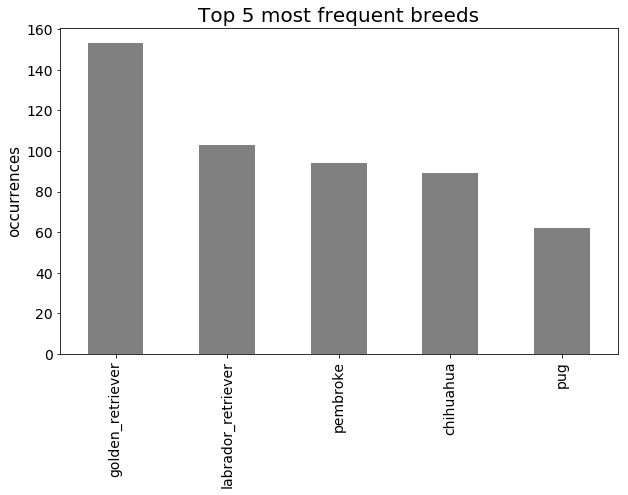

In [64]:
twitter_archive_master.breed.value_counts().nlargest(5).plot(kind='bar', label='', color=('gray'),figsize=(10,6))
pylab.ylabel("occurrences", fontsize=15)
pylab.title('Top 5 most frequent breeds', fontsize=20)
pylab.tick_params(axis='y', labelsize=14)
pylab.tick_params(axis='x', labelsize=14);

- 2. What breeds have the high favorite mean?


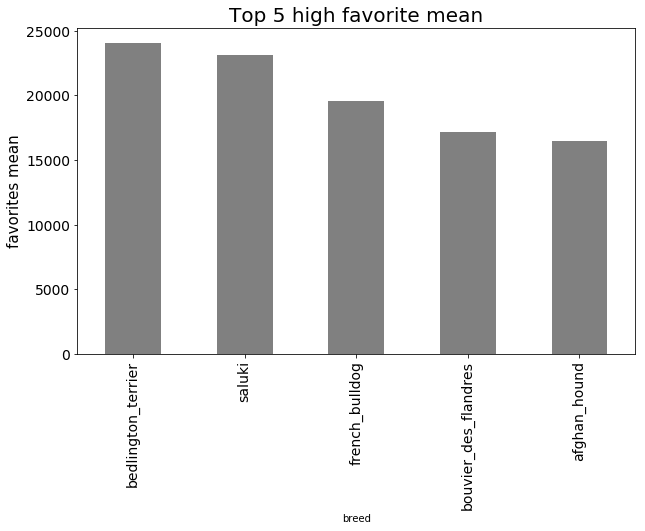

In [65]:
favorite_breeds = twitter_archive_master.groupby('breed')['favorites'].mean()
favorite_breeds.iloc[np.lexsort([-favorite_breeds.values])].nlargest(5).plot(kind='bar', color=('gray'), figsize=(10,6))
pylab.ylabel("favorites mean", fontsize=15)
pylab.title('Top 5 high favorite mean', fontsize=20)
pylab.tick_params(axis='x', labelsize=14)
pylab.tick_params(axis='y', labelsize=14)

- 3. What dogs stage receive more retweets?

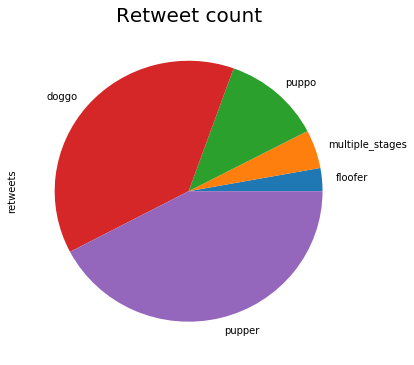

In [66]:
retweets_stages = twitter_archive_master.groupby('stage')['retweets'].sum()
retweets_stages.iloc[np.lexsort([-retweets_stages.values])].nsmallest(5).plot(kind='pie', figsize=(6,6))
pylab.title('Retweet count', fontsize=20);

In [67]:
retweets_stages.iloc[np.lexsort([-retweets_stages.values])].nsmallest(5)

stage
floofer             35059.0
multiple_stages     58480.0
puppo              146107.0
doggo              467813.0
pupper             518810.0
Name: retweets, dtype: float64

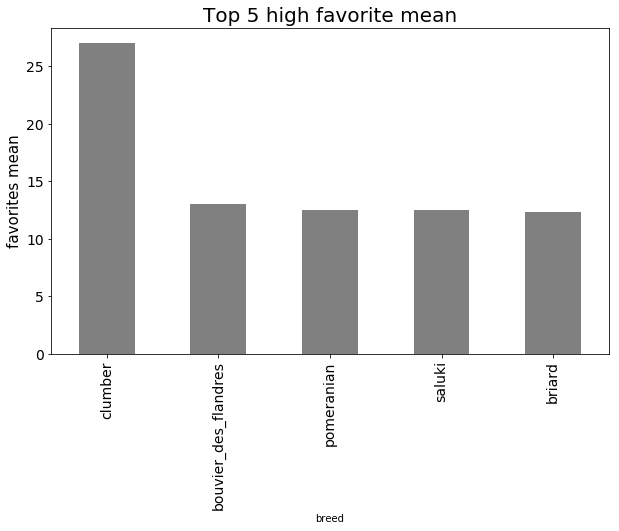

In [76]:
top_score_breeds = twitter_archive_master.groupby('breed')['rating_numerator'].mean()
top_score_breeds.iloc[np.lexsort([-favorite_breeds.values])].nlargest(5).plot(kind='bar', color=('gray'), figsize=(10,6))
pylab.ylabel("favorites mean", fontsize=15)
pylab.title('Top 5 high favorite mean', fontsize=20)
pylab.tick_params(axis='x', labelsize=14)
pylab.tick_params(axis='y', labelsize=14)

In [79]:
top_sem_clumber = twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.breed == 'clumber'].index)


In [80]:
top_score_breeds = top_sem_clumber.groupby('breed')['rating_numerator'].mean()
top_score_breeds.iloc[np.lexsort([-favorite_breeds.values])].nlargest(5).plot(kind='bar', color=('gray'), figsize=(10,6))
pylab.ylabel("favorites mean", fontsize=15)
pylab.title('Top 5 high favorite mean', fontsize=20)
pylab.tick_params(axis='x', labelsize=14)
pylab.tick_params(axis='y', labelsize=14)

IndexError: positional indexers are out-of-bounds

#### The most retweeted stage is *pupper*. Its important to note that most of the rows of our dataframe does not have the stage classification.